# UV Radiation Data Analysis Project

## Project overview

### 1) Introduction

### 2) Objective

* Assessment of four different types of photovoltaic (PV) encapsulant material under extreme environmental desert conditions.
* Assess the PV encapsulant materials degradation under ultraviolet (UV) outdoor exposure.
* Compare the degradation of the four encapsulant types by means of Short Circuit current ($I_{SC}$) generation by the 18 PV mono-module samples.
* Carry out these comparisons over time. Samples have been exposed under outdoor desert conditions about a year.

### 3) Experimental

18 PV mono-sample modules have been installed in a flat metal grid tilted at 23°, which is located at the Atacama Desert Solar Platform Facility, Chile. They have been distributed in a 3x6 array schema ordered by both PV encapsulant material and frontal glass type. $I_{SC}$ data has been collected by continuous measurements with a resolution of 1 minute for more than a year, starting from 2021-02-11 to 2022-08-17.

Bellow a picture of the experimental setup is shown. The experimental setup is as described above.

<img src="experimental1.jpeg"/>

## Data Analysis Procedure

The first part of the notebook is related with the standard procedure of `ETL` (extract-transform-load) as well as with the `EDA` (exploratory data analysis). In the ETL section it works as follow:
1) Data is loaded into a DataFrame (DF) from a *.csv file and displayed in order to inspect columns
2) The DF info is printed to inspect the data type of each column
3) Columns with NANs rows are removed
4) The important columns were selected and renamed 
5) Pandas method `pd.date_range` is implemented to index the data frame. The date range is that of the measurement campaing. This is done to set the index frequency and to avoid data type issues.
6) Then, the new DataFrame is loaded into parquet format with snappy compression type (default) for both storage and data efficiency

Regarding EDA, the procedure is as follows:
1) Data is loaded into a DataFrame (DF) from a *.parquet file
2) Both DataFrame `shape` and `info` are inspected
3) `Count` the number of `null values` present in the DataFrame per column
4) Statistical description of the dataset using `.describe()` method from `Pandas`

In [31]:
import os
import glob
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings(action='ignore')

mpl.rcParams["figure.figsize"] = (9, 7)
plt.style.use('seaborn-deep') # bmh

In [2]:
print(os.sys.version)
print(f"Numpy Version {np.__version__}")
print(f"Pandas Version {pd.__version__}")

3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
Numpy Version 1.22.3
Pandas Version 1.4.2


## Extract. Transform. Load (ETL)

In [3]:
path = "/Users/danieldiazalmeida/Downloads/"
file = "data_monosamples_20210211-20211222(1).csv"
data = os.path.join(path, file)
data

'/Users/danieldiazalmeida/Downloads/data_monosamples_20210211-20211222(1).csv'

In [4]:
df = pd.read_csv(data, header=88, delimiter=';')
df

,Time,AIN1 Statistics_Arithmetic_Mean_60s,AIN1 Statistics_MAX_60s,AIN1 Statistics_MIN_60s,AIN1 Statistics_StandarDeviation_60s,AIN10 Statistics_Arithmetic_Mean_60s,AIN10 Statistics_MAX_60s,AIN10 Statistics_MIN_60s,AIN10 Statistics_StandarDeviation_60s,AIN11 Statistics_Arithmetic_Mean_60s,...,AIN7 Statistics_StandarDeviation_60s,AIN8 Statistics_Arithmetic_Mean_60s,AIN8 Statistics_MAX_60s,AIN8 Statistics_MIN_60s,AIN8 Statistics_StandarDeviation_60s,AIN9 Statistics_Arithmetic_Mean_60s,AIN9 Statistics_MAX_60s,AIN9 Statistics_MIN_60s,AIN9 Statistics_StandarDeviation_60s,Memory
0,2/11/2021 12:01:00 AM,0.001093,0.001162,0.001010,0.000033,-0.016750,-0.016702,-0.016820,0.000028,0.007522,...,0.000074,-0.020373,-0.019367,-0.021712,0.000882,-0.002499,-0.002447,-0.002563,0.000026,223.0
1,2/11/2021 12:02:00 AM,0.001053,0.001118,0.000991,0.000027,-0.016793,-0.016718,-0.016879,0.000035,0.007483,...,0.000035,-0.021593,-0.021230,-0.021940,0.000176,-0.002531,-0.002459,-0.002605,0.000033,223.0
2,2/11/2021 12:03:00 AM,0.001062,0.001118,0.001013,0.000024,-0.016793,-0.016745,-0.016837,0.000024,0.007484,...,0.000027,-0.021653,-0.021273,-0.021960,0.000135,-0.002519,-0.002464,-0.002569,0.000020,223.0
3,2/11/2021 12:04:00 AM,0.001092,0.001137,0.001024,0.000026,-0.016768,-0.016693,-0.016836,0.000027,0.007505,...,0.000030,-0.021563,-0.021063,-0.021892,0.000190,-0.002509,-0.002440,-0.002552,0.000024,223.0
4,2/11/2021 12:05:00 AM,0.001048,0.001126,0.000983,0.000030,-0.016826,-0.016737,-0.016876,0.000033,0.007473,...,0.000082,-0.021558,-0.021115,-0.021908,0.000183,-0.002543,-0.002459,-0.002607,0.000029,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452872,12/22/2021 11:53:00 AM,5.767128,7.080736,5.115011,0.505367,7.819603,9.450339,6.996265,0.644551,5.943405,...,0.504163,5.609704,6.885957,4.975008,0.496186,6.603415,8.111066,5.852564,0.586178,108.0
452873,12/22/2021 11:54:00 AM,5.384764,5.694979,5.207503,0.104032,7.344300,7.764387,7.117003,0.136669,5.547583,...,0.100306,5.226961,5.500509,5.057420,0.097257,6.156717,6.480552,5.954949,0.115904,108.0
452874,12/22/2021 11:55:00 AM,5.477228,5.716399,5.210583,0.138745,7.463186,7.752704,7.122680,0.173425,5.635589,...,0.140925,5.315117,5.542645,5.054001,0.133537,6.270272,6.545860,5.954627,0.161255,108.0
452875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.iloc[:-2, :]
print(df.shape)
print("-----------------")
print(df.info())

(452875, 74)
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452875 entries, 0 to 452874
Data columns (total 74 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Time                                   452875 non-null  object 
 1   AIN1 Statistics_Arithmetic_Mean_60s    452875 non-null  float64
 2   AIN1 Statistics_MAX_60s                452875 non-null  float64
 3   AIN1 Statistics_MIN_60s                452875 non-null  float64
 4   AIN1 Statistics_StandarDeviation_60s   452875 non-null  float64
 5   AIN10 Statistics_Arithmetic_Mean_60s   452875 non-null  float64
 6   AIN10 Statistics_MAX_60s               452875 non-null  float64
 7   AIN10 Statistics_MIN_60s               452875 non-null  float64
 8   AIN10 Statistics_StandarDeviation_60s  452875 non-null  float64
 9   AIN11 Statistics_Arithmetic_Mean_60s   452875 non-null  float64
 10  AIN11 Statistics_MAX_60s 

In [6]:
df["Time"] = pd.to_datetime(df.Time)
df.drop(columns='Memory', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452875 entries, 0 to 452874
Data columns (total 73 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Time                                   452875 non-null  datetime64[ns]
 1   AIN1 Statistics_Arithmetic_Mean_60s    452875 non-null  float64       
 2   AIN1 Statistics_MAX_60s                452875 non-null  float64       
 3   AIN1 Statistics_MIN_60s                452875 non-null  float64       
 4   AIN1 Statistics_StandarDeviation_60s   452875 non-null  float64       
 5   AIN10 Statistics_Arithmetic_Mean_60s   452875 non-null  float64       
 6   AIN10 Statistics_MAX_60s               452875 non-null  float64       
 7   AIN10 Statistics_MIN_60s               452875 non-null  float64       
 8   AIN10 Statistics_StandarDeviation_60s  452875 non-null  float64       
 9   AIN11 Statistics_Arithmetic_Mean_60s   452875 no

In [7]:
cols_to_use = [
    "Time"
    ,"AIN1 Statistics_Arithmetic_Mean_60s"
    ,"AIN2 Statistics_Arithmetic_Mean_60s"
    ,"AIN3 Statistics_Arithmetic_Mean_60s"
    ,"AIN4 Statistics_Arithmetic_Mean_60s"
    ,"AIN5 Statistics_Arithmetic_Mean_60s"
    ,"AIN6 Statistics_Arithmetic_Mean_60s"
    ,"AIN7 Statistics_Arithmetic_Mean_60s"
    ,"AIN8 Statistics_Arithmetic_Mean_60s"
    ,"AIN9 Statistics_Arithmetic_Mean_60s"
    ,"AIN10 Statistics_Arithmetic_Mean_60s"
    ,"AIN11 Statistics_Arithmetic_Mean_60s"
    ,"AIN12 Statistics_Arithmetic_Mean_60s"
    ,"AIN13 Statistics_Arithmetic_Mean_60s"
    ,"AIN14 Statistics_Arithmetic_Mean_60s"
    ,"AIN15 Statistics_Arithmetic_Mean_60s"
    ,"AIN16 Statistics_Arithmetic_Mean_60s"
    ,"AIN17 Statistics_Arithmetic_Mean_60s"
    ,"AIN18 Statistics_Arithmetic_Mean_60s"
]
df = df[cols_to_use]
print(df.shape)
print("-----------------------------------------------------------")
df.head()

(452875, 19)
-----------------------------------------------------------


,Time,AIN1 Statistics_Arithmetic_Mean_60s,AIN2 Statistics_Arithmetic_Mean_60s,AIN3 Statistics_Arithmetic_Mean_60s,AIN4 Statistics_Arithmetic_Mean_60s,AIN5 Statistics_Arithmetic_Mean_60s,AIN6 Statistics_Arithmetic_Mean_60s,AIN7 Statistics_Arithmetic_Mean_60s,AIN8 Statistics_Arithmetic_Mean_60s,AIN9 Statistics_Arithmetic_Mean_60s,AIN10 Statistics_Arithmetic_Mean_60s,AIN11 Statistics_Arithmetic_Mean_60s,AIN12 Statistics_Arithmetic_Mean_60s,AIN13 Statistics_Arithmetic_Mean_60s,AIN14 Statistics_Arithmetic_Mean_60s,AIN15 Statistics_Arithmetic_Mean_60s,AIN16 Statistics_Arithmetic_Mean_60s,AIN17 Statistics_Arithmetic_Mean_60s,AIN18 Statistics_Arithmetic_Mean_60s
0,2021-02-11 00:01:00,0.001093,-0.014695,0.003101,-0.000986,-0.006020,0.003497,-0.000707,-0.020373,-0.002499,-0.016750,0.007522,-0.015595,-0.006051,0.005257,0.001156,-0.004625,0.002225,-0.004211
1,2021-02-11 00:02:00,0.001053,-0.014728,0.003036,-0.001026,-0.006045,0.003456,-0.000693,-0.021593,-0.002531,-0.016793,0.007483,-0.015706,-0.006069,0.005224,0.001019,-0.004664,0.002212,-0.004175
2,2021-02-11 00:03:00,0.001062,-0.014725,0.003037,-0.001019,-0.006065,0.003442,-0.000705,-0.021653,-0.002519,-0.016793,0.007484,-0.015664,-0.006076,0.005212,0.001058,-0.004653,0.002160,-0.004206
3,2021-02-11 00:04:00,0.001092,-0.014708,0.003052,-0.001018,-0.006038,0.003461,-0.000688,-0.021563,-0.002509,-0.016768,0.007505,-0.015550,-0.006046,0.005222,0.001063,-0.004646,0.002238,-0.004155
4,2021-02-11 00:05:00,0.001048,-0.014752,0.003011,-0.001047,-0.006060,0.003449,-0.000755,-0.021558,-0.002543,-0.016826,0.007473,-0.015599,-0.006067,0.005205,0.000995,-0.004664,0.002213,-0.004170


In [8]:
df.tail()

,Time,AIN1 Statistics_Arithmetic_Mean_60s,AIN2 Statistics_Arithmetic_Mean_60s,AIN3 Statistics_Arithmetic_Mean_60s,AIN4 Statistics_Arithmetic_Mean_60s,AIN5 Statistics_Arithmetic_Mean_60s,AIN6 Statistics_Arithmetic_Mean_60s,AIN7 Statistics_Arithmetic_Mean_60s,AIN8 Statistics_Arithmetic_Mean_60s,AIN9 Statistics_Arithmetic_Mean_60s,AIN10 Statistics_Arithmetic_Mean_60s,AIN11 Statistics_Arithmetic_Mean_60s,AIN12 Statistics_Arithmetic_Mean_60s,AIN13 Statistics_Arithmetic_Mean_60s,AIN14 Statistics_Arithmetic_Mean_60s,AIN15 Statistics_Arithmetic_Mean_60s,AIN16 Statistics_Arithmetic_Mean_60s,AIN17 Statistics_Arithmetic_Mean_60s,AIN18 Statistics_Arithmetic_Mean_60s
452870,2021-12-22 11:51:00,8.187697,8.431266,8.834072,8.298270,8.372410,8.557497,8.267543,7.928185,9.360013,10.140176,8.399701,8.301611,8.476912,8.207476,8.250157,8.155952,8.333110,8.681092
452871,2021-12-22 11:52:00,7.673099,7.928927,8.323293,7.790760,7.866677,8.024177,7.743711,7.445350,8.783700,9.922019,7.879715,7.779465,7.953148,7.696300,7.727334,7.634748,7.812216,8.132307
452872,2021-12-22 11:53:00,5.767128,5.960596,6.320126,5.882093,5.921279,6.055169,5.912915,5.609704,6.603415,7.819603,5.943405,5.871339,6.004487,5.807527,5.797991,5.728437,5.871423,6.112501
452873,2021-12-22 11:54:00,5.384764,5.574492,5.926461,5.526902,5.540727,5.643859,5.501942,5.226961,6.156717,7.344300,5.547583,5.483572,5.606481,5.420935,5.407614,5.344039,5.473972,5.699093
452874,2021-12-22 11:55:00,5.477228,5.680335,6.007376,5.624515,5.673560,5.738857,5.600714,5.315117,6.270272,7.463186,5.635589,5.574713,5.699465,5.509663,5.497161,5.432240,5.562735,5.791332


In [9]:
idx = pd.date_range(start="2021-02-11 00:01:00", end="2021-12-22 11:55:00", freq='min')
idx

DatetimeIndex(['2021-02-11 00:01:00', '2021-02-11 00:02:00',
               '2021-02-11 00:03:00', '2021-02-11 00:04:00',
               '2021-02-11 00:05:00', '2021-02-11 00:06:00',
               '2021-02-11 00:07:00', '2021-02-11 00:08:00',
               '2021-02-11 00:09:00', '2021-02-11 00:10:00',
               ...
               '2021-12-22 11:46:00', '2021-12-22 11:47:00',
               '2021-12-22 11:48:00', '2021-12-22 11:49:00',
               '2021-12-22 11:50:00', '2021-12-22 11:51:00',
               '2021-12-22 11:52:00', '2021-12-22 11:53:00',
               '2021-12-22 11:54:00', '2021-12-22 11:55:00'],
              dtype='datetime64[ns]', length=452875, freq='T')

In [10]:
df.Time = idx
df.set_index("Time", inplace=True)

In [11]:
df.rename(
    columns={
        "AIN1 Statistics_Arithmetic_Mean_60s":"AIN1"
        ,"AIN2 Statistics_Arithmetic_Mean_60s":"AIN2"
        ,"AIN3 Statistics_Arithmetic_Mean_60s":"AIN3"
        ,"AIN4 Statistics_Arithmetic_Mean_60s":"AIN4"
        ,"AIN5 Statistics_Arithmetic_Mean_60s":"AIN5"
        ,"AIN6 Statistics_Arithmetic_Mean_60s":"AIN6"
        ,"AIN7 Statistics_Arithmetic_Mean_60s":"AIN7"
        ,"AIN8 Statistics_Arithmetic_Mean_60s":"AIN8"
        ,"AIN9 Statistics_Arithmetic_Mean_60s":"AIN9"
        ,"AIN10 Statistics_Arithmetic_Mean_60s":"AIN10"
        ,"AIN11 Statistics_Arithmetic_Mean_60s":"AIN11"
        ,"AIN12 Statistics_Arithmetic_Mean_60s":"AIN12"
        ,"AIN13 Statistics_Arithmetic_Mean_60s":"AIN13"
        ,"AIN14 Statistics_Arithmetic_Mean_60s":"AIN14"
        ,"AIN15 Statistics_Arithmetic_Mean_60s":"AIN15"
        ,"AIN16 Statistics_Arithmetic_Mean_60s":"AIN16"
        ,"AIN17 Statistics_Arithmetic_Mean_60s":"AIN17"
        ,"AIN18 Statistics_Arithmetic_Mean_60s":"AIN18"
    }, 
    inplace=True
)

In [12]:
df = df.applymap(lambda row: 0 if row < 0 else row)
df.to_parquet("dataTecnaliaPSDAEssay.parquet", compression="snappy", index=True)

## Exploratory Data Analysis (E.D.A.)

Importing the data from `dataTecnaliaPSDAEssay.parquet` file and displaying it

In [13]:
df = pd.read_parquet("dataTecnaliaPSDAEssay.parquet")
df

,AIN1,AIN2,AIN3,AIN4,AIN5,AIN6,AIN7,AIN8,AIN9,AIN10,AIN11,AIN12,AIN13,AIN14,AIN15,AIN16,AIN17,AIN18
Time,,,,,,,,,,,,,,,,,,
2021-02-11 00:01:00,0.001093,0.000000,0.003101,0.000000,0.000000,0.003497,0.000000,0.000000,0.000000,0.000000,0.007522,0.000000,0.000000,0.005257,0.001156,0.000000,0.002225,0.000000
2021-02-11 00:02:00,0.001053,0.000000,0.003036,0.000000,0.000000,0.003456,0.000000,0.000000,0.000000,0.000000,0.007483,0.000000,0.000000,0.005224,0.001019,0.000000,0.002212,0.000000
2021-02-11 00:03:00,0.001062,0.000000,0.003037,0.000000,0.000000,0.003442,0.000000,0.000000,0.000000,0.000000,0.007484,0.000000,0.000000,0.005212,0.001058,0.000000,0.002160,0.000000
2021-02-11 00:04:00,0.001092,0.000000,0.003052,0.000000,0.000000,0.003461,0.000000,0.000000,0.000000,0.000000,0.007505,0.000000,0.000000,0.005222,0.001063,0.000000,0.002238,0.000000
2021-02-11 00:05:00,0.001048,0.000000,0.003011,0.000000,0.000000,0.003449,0.000000,0.000000,0.000000,0.000000,0.007473,0.000000,0.000000,0.005205,0.000995,0.000000,0.002213,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22 11:51:00,8.187697,8.431266,8.834072,8.298270,8.372410,8.557497,8.267543,7.928185,9.360013,10.140176,8.399701,8.301611,8.476912,8.207476,8.250157,8.155952,8.333110,8.681092
2021-12-22 11:52:00,7.673099,7.928927,8.323293,7.790760,7.866677,8.024177,7.743711,7.445350,8.783700,9.922019,7.879715,7.779465,7.953148,7.696300,7.727334,7.634748,7.812216,8.132307
2021-12-22 11:53:00,5.767128,5.960596,6.320126,5.882093,5.921279,6.055169,5.912915,5.609704,6.603415,7.819603,5.943405,5.871339,6.004487,5.807527,5.797991,5.728437,5.871423,6.112501


Now, the following step is to inspect both the shape and the info from the DataFrame. The shape let us know how many observations (rows) and predictors (columns) are present. In addition, the info allows to inspect the data type of each predictor, the count of non-null values, the columns count as well as their name.

In [14]:
print("Data Frame shape:    {}".format(df.shape))
df.info()

Data Frame shape:    (452875, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452875 entries, 2021-02-11 00:01:00 to 2021-12-22 11:55:00
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AIN1    452875 non-null  float64
 1   AIN2    452875 non-null  float64
 2   AIN3    452875 non-null  float64
 3   AIN4    452875 non-null  float64
 4   AIN5    452875 non-null  float64
 5   AIN6    452875 non-null  float64
 6   AIN7    452875 non-null  float64
 7   AIN8    452875 non-null  float64
 8   AIN9    452875 non-null  float64
 9   AIN10   452875 non-null  float64
 10  AIN11   452875 non-null  float64
 11  AIN12   452875 non-null  float64
 12  AIN13   452875 non-null  float64
 13  AIN14   452875 non-null  float64
 14  AIN15   452875 non-null  float64
 15  AIN16   452875 non-null  float64
 16  AIN17   452875 non-null  float64
 17  AIN18   452875 non-null  float64
dtypes: float64(18)
memory usage: 65.6 MB


The null values count allows to have an insight about how the data has been collected. That is,  

In [15]:
df.isnull().sum()

AIN1     0
AIN2     0
AIN3     0
AIN4     0
AIN5     0
AIN6     0
AIN7     0
AIN8     0
AIN9     0
AIN10    0
AIN11    0
AIN12    0
AIN13    0
AIN14    0
AIN15    0
AIN16    0
AIN17    0
AIN18    0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AIN1,452875.0,3.697456,4.066210,0.0,0.001706,1.348793,8.491969,10.000000
AIN2,452875.0,3.687677,4.064515,0.0,0.000000,1.325629,8.499298,10.000000
AIN3,452875.0,3.587183,3.934749,0.0,0.009419,1.330518,8.224301,10.000000
AIN4,452875.0,3.541037,3.900494,0.0,0.000026,1.294984,8.104712,10.000000
AIN5,452875.0,3.710362,4.078144,0.0,0.000000,1.368522,8.540362,10.000000
AIN6,452875.0,3.750369,4.112782,0.0,0.002704,1.395959,8.644054,10.000000
AIN7,452875.0,3.554876,3.916403,0.0,0.000000,1.293154,8.166108,10.000000
AIN8,452875.0,3.576547,3.939473,0.0,0.000000,1.313814,8.205165,10.011640
AIN9,452875.0,4.037325,4.340599,0.0,0.000000,1.729764,9.496357,13.610638
AIN10,452875.0,4.164141,4.436539,0.0,0.000000,1.941652,9.853932,10.140176


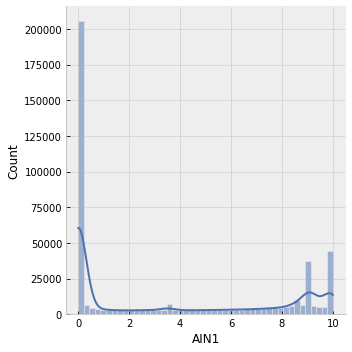

In [25]:
sns.displot(df, x="AIN1", kde=True)
plt.show()

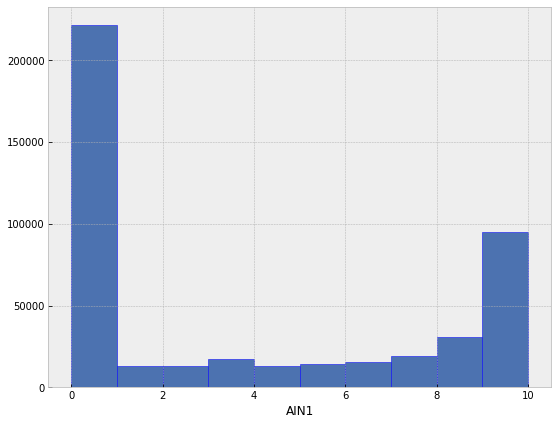

In [33]:
df.AIN1.hist(edgecolor='b',)
plt.xlabel("AIN1")
plt.show()

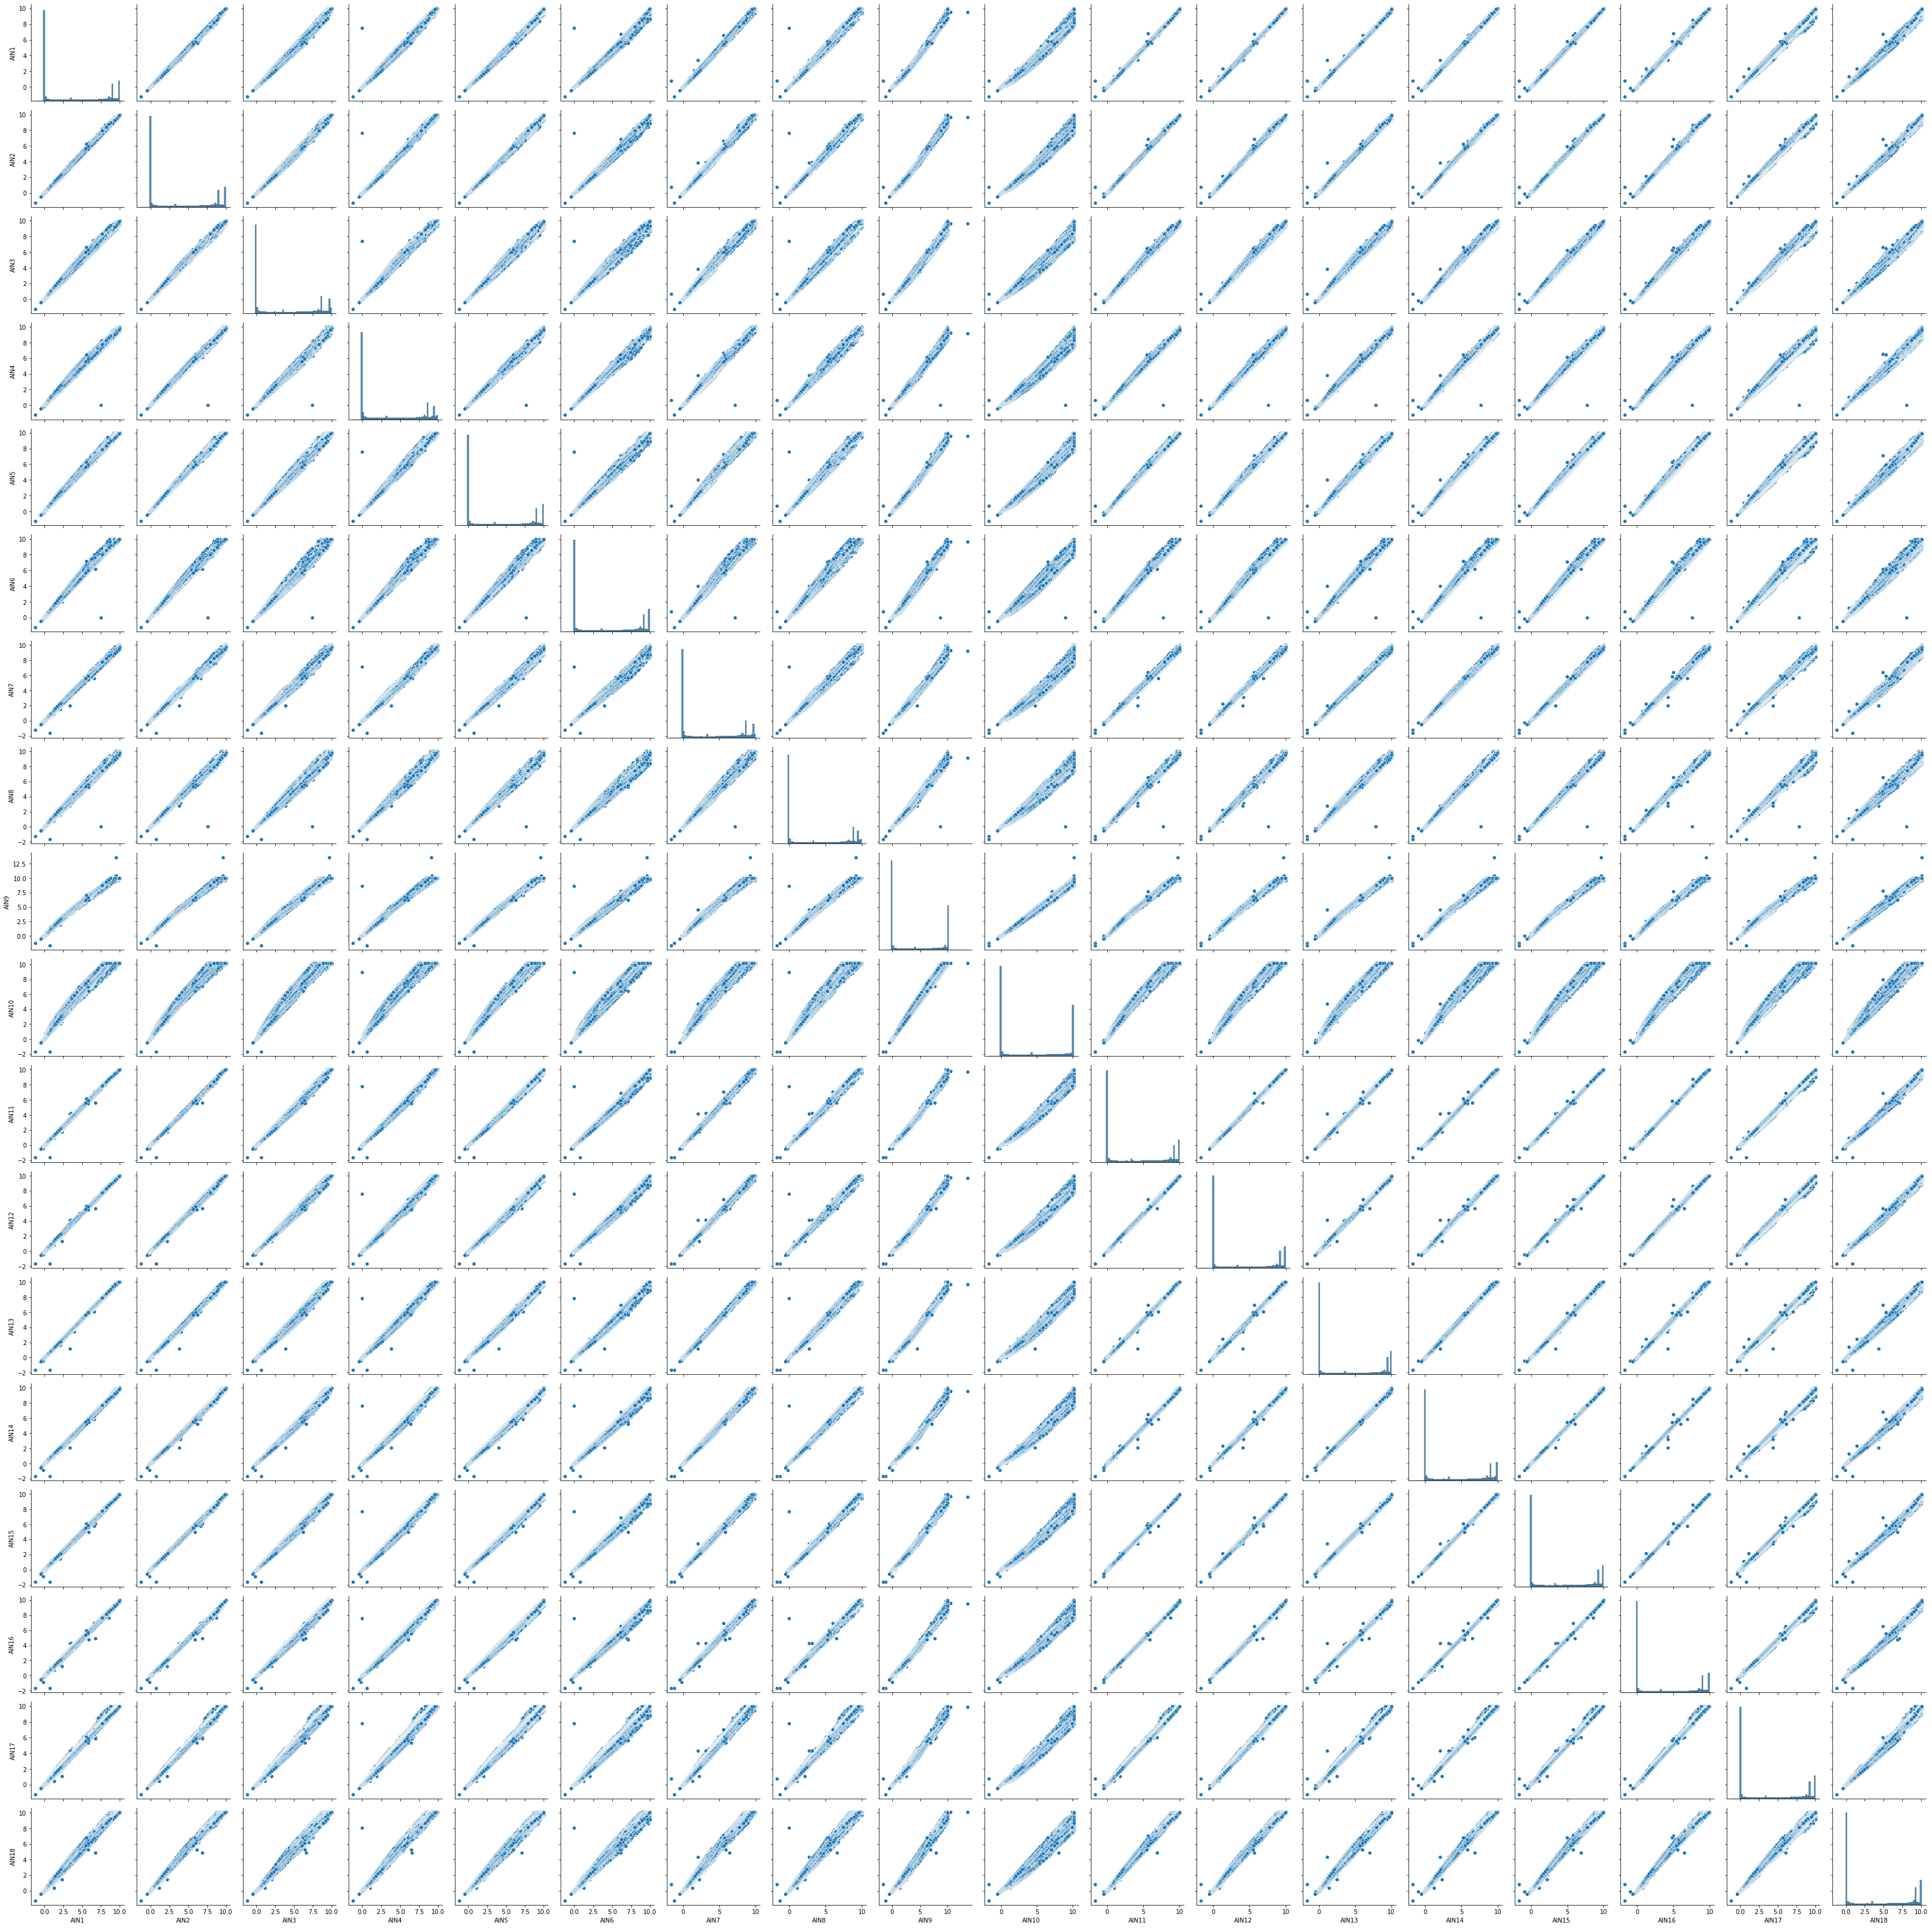

In [20]:
g = sns.PairGrid(df.select_dtypes("float"))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)